## Building an Employee Churn Model in Python

1.) Problem Definition.

2.) DataAnalysis.

3.) EDA Concluding Remark.

4.) Pre-Processing Pipeline.

5.) Building Machine Learning Models.

6.) Concluding Remarks.

## Problem Definition:

Churn Prediction is probably one of the most important application in a Commericial Sector.

Churn is defined in business terms as 'When a client cancels a subscription to a service they have been using'.A Common example is people cancelling Amazon/Netflix Subscriptions. So churn prediction  is essentially predecting which clients are most likely to cancel subscription i.e.'leave a company'based on their usage of the service.

From a company point of view,it is necessary to gain this information because acquiring new customers is often ardous and costlier than retaining old ones.

Churn Prediction helps them to focus more on the customers that are at a high risk of Leaving.

The Output in these case of Churn prediction is a simple yes or no. That makes it a classification problem where you have to predict 1 if the customer like to Churn or 0 otherwise.

## 2.) Data Analysis:

I have used the Customer Churn Dataset from the github.

## Importing Impotant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

## Loading the DATASET:

In [ ]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

In [ ]:
pd.set_option("display.max_columns",None)
df

Here we have imported dataset using pd.read_csv and the set the option to display all the columns present into the dataset.

The dataset contains the details of customers in which both numerical and categorical data are Presnt.Here "Churn" is the target varaible which contains two categories so it will termed as "Classification problem" where we need to predict the several customer churn using the classification models.

In [ ]:
## Importing Necessary Libraries
import os
import scipy as stats
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### 3.) Exploratory Data Analysis(EDA):

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

We can see there are a total 20 columns in our dataset.

In [ ]:
# Checking the null values in dataframe
df.isnull().sum()

In [ ]:
df.dtypes

There are three different datatypes present in the dataset.There is one column is float datatype and two integer datatypes and remaining are object datatypes. 

In [ ]:
# Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

In [ ]:
df["TotalCharges"].unique()

We can observe that the "Totalcharges"has the continuous data but when we checked the data type it is showing object datatype due to some reason also if we notice the value counts,11 rows of this column has blank data.Let's handle this column.

In [ ]:
# Checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

By locating the TotalCharges we can find this column has space as values but it showing 0 missing values in this columns, Let's fill this column by some values and then we will convert this into a float type. 

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

In [ ]:
# Converting the object data type into float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

Successfully we had converted into float data type, because of some reason that it shows the object data type. Now all the column of TotalCharges had all float numbers in the dataset is float data type.

In [ ]:
# Lets check null values again
df.isnull().sum()

Since we have filled the blank spaces in TotalCharges column with nan values,It's showing 11 null values in that column. Replacing the NAN values using mean method as the column TotalCharges is continuous in nature.

In [ ]:
# Checking the mean of TotalCharges column
print("The Mean value of TotalCharges is:",df["TotalCharges"].mean())

In [ ]:
#Filling the null values in TotalCharges with its mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [ ]:
#Lets check null values again
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

In [ ]:
df.info()

By Info method we get information about the dataset which includes indexing type,column type non-null values and memory usage.Here we can see these 3 types of data present,2 integer type,2 float type and 17 object type .We will use encoding methods to convert this object type data into numerical data in the later part. 

In [ ]:
# Separating numerical and ctegorical columns

#Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

#Now checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical_columns are:\n",numerical_col)        

In [ ]:
#Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

These are the unique values presnt in the Dataset.Here Customer ID column has the data of unique ID given to the customers wich is not required for the predictions.

Lets drop this column.

In [ ]:
#Dropping Customer ID column
df.drop('customerID',axis=1,inplace=True)

In [ ]:
# Checking the list of counts target
df['Churn'].unique()

There re two categories present in the target column namely "No" and "Yes".

In [ ]:
# Checking the unique values in target column
df['Churn'].value_counts()

There are two categories in the column Churn namely No and Yes. We can assume that "No" stands for the customers who have not Churned and "Yes" stands for the customers who have got churned from the company.

### Description of Dataset

In [ ]:
df.describe()

This give the statistical information of the numerical columns.The summary of this dataset looks perfect since there is no negitive/invalid values present.

From the above description we can observe the following things.

The counts of all the 3 columns are same which means there are no missing values in the dataset. The mean value is greater then the median(50%)in tenure and TotalCharges columns which means the data is skewed to right in these columns. The data in the column Monthly Charges have mean value less than median that means the data is skewed to left.

By summarising the data we can observe there is huge difference between 75% and max hence there are outliers present in the data which we will remove them later on using appropriate methods.We can also notice the Standard deviation,min,25% precentile value from the describe method.

## Data Visulization:

We need explore the data to find some patterns

### Univariate Analysis:

In [ ]:
# Visualize the number of Churned Customers
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette='cool')
plt.show()

From the count plot we can observe that the count of "No Churn" are high compared to the count of "Yes Churn".That is there are more number of customers who have churned. This lead to class to class imbalance issue in the data, we will rectify it by using oversampling method in later part.

In [ ]:
# Visulize the count of Gender
print(df['gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(6,6))
colors=["g","crimson"]
ax.pie(df['gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

From the plot we can observe the total number of male and female customers are almost same,but still the count of male is 3555 which is high compared to count of female which has 3448 counts.

In [ ]:
# Visualize the count of Gender
print(df['SeniorCitizen'].value_counts())
labels='0','1'
fig, ax = plt.subplots(figsize=(6,6))
colors=["y","teal"]
ax.pie(df['SeniorCitizen'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,explode=(0.88,0),colors=colors)
plt.show()

Here 0 represents the non SeniorCitizens and 1 represents the SeniorCitizens. The count of 0 is high in data compared to 1 which the number non-seniorcitizens are quite high comparted to seniorcitizens data in the given dataset. Around 83% of the customers non-Seniorcitizens and only 16% are SeniorCitizens.

In [ ]:
# Visualizing how many customers have their partners
print(df["Partner"].value_counts())
sns.countplot(df["Partner"],palette="Set1")
plt.show()


The Count for partner details are almost similar and the customers who do not have partners are bit higher than who have partners

In [ ]:
# Visualize the count of Gender
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors=["tab:green","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0),colors=colors)
plt.show()

The customers who have dependents are very less in counts that means they do not have anyone dependent on them. Here arround 70% of customers have dependents only 29.96% have no dependents.

In [ ]:
# Visualize the how many customers have phone service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"],palette="magma")
plt.show()

The customers who have phone services are Large in numbers and who do not own phone services are very less in number

In [ ]:
# Visualize count of multiple lines
print(df['MultipleLines'].value_counts())
sns.countplot(df["MultipleLines"],palette="prism")
plt.show()

The customers who have phone service from single line have high counts compared to the customers having phone services from multiplelines, also the customers who do not have phone services have covered very less data compared to others.

In [ ]:
# Visualizing the how many customers have internetservices
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette='husl')
plt.show()

Most of the customers have chosen to get Fiber optic InternetService followed by DSL,but there are many customers who do not get an internet service.

In [ ]:
# Visualizing how many customer having online security
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"],palette="plasma")
plt.show()

It is obvious that the customer who have internet service they needs online security and who do not own any intentent services,they do not need online security.But from the count plot we can obeserve the majority of customers who have internet services but they do not use any online security services.

In [ ]:
# Visualizing how many customers have online backup
print(df['OnlineBackup'].value_counts())
labels='No','Yes',"No Internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["teal","darkorange","hotpink"]
ax.pie(df['OnlineBackup'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

It is obvious that the customers who do not own internet services and online security, they do not need onlinebackup usage.From the plot we can see the majority of customers who own internetservices they do not have OnlineBackups and the customers who own internet services have very less onlinebackup.Also the customers who do not have internet services  have very less online backup counts compared to others

In [ ]:
# visualizing how many customers have deviceprotection
print(df["DeviceProtection"].value_counts())
labels='No','Yes',"No internet services"
fig, ax = plt.subplots(figsize=(6,6))
colors=["r","g","maroon"]
ax.pie(df['DeviceProtection'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=False,colors=colors)
plt.show()

From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. And the customers who do not have internet access they do not need any device protection.

In [ ]:
# visualizing how many customers have Techsupport 
print(df['TechSupport'].value_counts())
labels='No','Yes',"No internet srvices"
fig, ax = plt.subplots(figsize=(6,6))
colors=['g','tab:brown','violet']
ax.pie(df['TechSupport'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,colors=colors)
plt.show()

The customers who do not need any technical support are high in counts compared to the customers who need technical support. Around 49% of the people do not need any technical support and only 29% needs.

In [ ]:
# visualizing how many customers have streamingtv
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"],palette="mako")
plt.show

The customers who do not use streamingTV have little bit high in numbers than the customers who do use StreamingTV. And the customers who do not own internet they do not have this service much.

In [ ]:
# visualizing how many customers have streamingmovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"],palette="bright")
plt.show()

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

In [ ]:
# visualizing how many customers have contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"],palette="PuRd")
plt.show()

Most of the customers prefer Month to Month contract compared to 1 year and 2 years contract but where as next prefer goes to two year contract rather than one year contract.

In [ ]:
# visualizing how many customers have paymentmethod
print(df['PaperlessBilling'].value_counts())
labels='Yes','No'
fig, ax = plt.subplots(figsize=(6,6))
colors=["lime","maroon"]
ax.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False, colors=colors)
plt.show()

Most of the customers prefer paperless billing and average number of customers who do not prefer paper less billing, they may like to receive paper billing.

In [ ]:
# visualizing how many customers have contract
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"],palette="mako")
plt.xticks(rotation=70)
plt.show()


Most of the customers prefer Electronic check payment method and the customers who prefer Mailed Check, bank transfer and Credit card have average in count.

## Plotting Numerical Columns

In [ ]:
# Lets check how the data has been distributed in remaining columns
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='m')
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=15)
    plotnumber+=1
plt.tight_layout()  

From the above distribution plots we can notice that data almost looks normal in all columns expect seniorCitizen.And the data in the column TotalCharges is skewed to right. Other two columns tenure and MonthlyCharges do not have skewness.

## Bivariate Analysis:

In [ ]:
# Comparing tenure and seniorcitizen
plt.title("Comparision between SeniorCitizen and Tenure")
sns.stripplot(x= "SeniorCitizen",y="tenure",data=df)
plt.show()

There is no significant difference between the features(tenure&seniorcitizen), here both the feature are in equal length.

In [ ]:
# comparing gender and monthlycharges
plt.title("Comparsion betwen gender and MonthlyCharges")
sns.violinplot(x= "gender",y="MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Both male and female customers with monthly charges above 60 have high chances of getting churned.

In [ ]:
# comparing tenure and TotalCharges
plt.title("Comparsion between tenure and TotalCharges")
sns.scatterplot(x= "tenure",y= "TotalCharges", data = df,hue="Churn",palette="mako")
plt.show()

Here we can notice the strong linear relation between the features. As the tenure increases, TotalCharges also increases rapidly. If the customers have low tenure services then there is high chance of churn.

In [ ]:
# comparing gender and seniorcitizen on the basis of churn
plt.title("Comparsion between churn and gender")
sns.barplot(x="gender",y="SeniorCitizen",data=df,palette="winter_r",hue="Churn")
plt.show()

There is no significant difference between the columns. The customer's churns remains unaffected in gender and SeniorCitizen case.

In [ ]:
# comparing totalcharges and monthly charges
plt.title('Comparsion between TotalCharges and MonthlyCharges')
sns.scatterplot(x="TotalCharges",y="MonthlyCharges",data=df,hue="Churn",palette="bright")
plt.show()

There is a linear relation between the features. The customers with high monthly charges have high tendancy to stop the services since they have high total charges. Also the if the customers ready to contribute with the monthly charges then there is an increment in the total charges.

In [ ]:
fig, axes=plt.subplots(2,2,figsize=(12,10))

# checking churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=df,palette="Dark2",hue="Churn")

# checking churn level in totalcharges
sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=df,palette="Dark2",hue="Churn",split=True)

# checking churn level in  monthlycharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[1,0],data=df,palette="Dark2",hue="Churn",split=True)

# checking churn level in seniorcitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,1],data=df,palette="Dark2",hue="Churn")
plt.show()

The customers who have dependents with high tenure, then the churned level is high80-110.

The customers who have total charges in the range of 0-2000 with dependents then the chance of getting churned is high.

The customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then teh ratio of churn is very high.

If the customer is a senior citizen and have no dependents then there is a tendancy of getting churned.

In [ ]:
#checking churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# checking churn level and gender
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

#checking churn level in dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="twilight_shifted",kind="count")
            
#checking churn level in phoneservice
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()

In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level.

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned.

In [ ]:
#checking churn level and multiplelines
sns.catplot(x='MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

The customers who have phone services from single line have high churn rate compared to the customers having phone services from multiple lines, also there are very less number of customers who do not have phone services.

In [ ]:
#checking churn level in internetservice
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=df)
plt.show()

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and and need to be focused on. And the customers who own DSL service they have very less churn rate.

In [ ]:
#checking churn level in onlinesecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()

The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

In [ ]:
# checking churn level in onlinebackup
sns.catplot(x='OnlineBackup',col='Churn',palette="prism",kind="count",data=df)
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup. The customers who do not have online backup services they have high churn rate.

In [ ]:
# checking churn level in deviceprotection
sns.catplot(x='DeviceProtection',hue='Churn',palette="gist_heat",kind="count",data=df)
plt.show()

The customers who do not own any Device protection have very high churn rate compared to others.

In [ ]:
# checking churn level in techsupport
sns.catplot(x='TechSupport',col='Churn',palette="Set2_r",kind="count",data=df)
plt.show()

Here we can clearly see that the customers who do not have any techsupport then they have high churn ratio.

In [ ]:
#checking churn level in streamingTv
sns.catplot(x='StreamingTV',hue='Churn',palette="cool_r",kind="count",data=df)
plt.show()


The churn level is nearly same if the customer own StreamingTV or not.

In [ ]:
# checking churn level in streamingmovies
sns.catplot(x='StreamingMovies',hue='Churn',palette='cividis',kind="count",data=df)
plt.show()

The customers who are existing in the company they do not own StreamingMovies in their devices And the churn rate is low when the customer do not have internet services.

In [ ]:
#checking churn level in contract
sns.catplot(x='Contract',hue='Churn',palette="gnuplot2",kind="count",data=df)
plt.show()

The customers who have churned are mostly having month to month contract.

In [ ]:
# checking churn level in paperlessBillibg
sns.catplot(x='PaperlessBilling',hue='Churn',palette="gist_earth",kind="count",data=df)
plt.show()

The customers who prefer paperless billing they have chumrate.

In [ ]:
# checking churn level in paymentmethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="gnuplot",kind="count",data=df)
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

## Multivariate Analysis:

In [ ]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.

The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.

There are no outliers in any of the columns but let's plot box plot to identify the outliers.

In [ ]:
# let's check the outliers by plotting bbox plot

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=12)
        plt.yticks(rotation=0,size=12)
    plotnumber+=1
    plt.tight_layout()

The column Senior Citizen has outliers but it contains categorical data so no need to remove outliers. Apart from this none of the columns have outliers.

## Checking for skewness

In [ ]:
# checking for skewness
df.skew()

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness but in TotalCharges. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

## Removing skewness

In [ ]:
# removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

we have removed the skewness using cube root method.

In [ ]:
#checking skewness
df.skew()

We can see the skewness has been reduced in TotalCharges column.

In [ ]:
# let's visualize how the data has been distributed in toatalchharges after removing skewness
sns.distplot(df["TotalCharges"],color="m",kde_kws={"shade": True},hist=False)
plt.show()

The looks almost normal and skewness is removed.    

## Pre-Processing Pipeline

#### Encoding the categorical columns using Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

Now we have converted the categorical columns into numerical columns using Ordinal Encoding method.

In [ ]:
# statistical summary of numerical columns
df.describe()

After encoding the categorical column we are able to see all the columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method descrbes the count, mean, standard deviation, min, IQR and max values of all the columns.

### Correlation between the target variable and independent variables using HEAT map

In [ ]:
#checking the correlatipon between features and the target
cor =df.corr()
cor

This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

In [ ]:
#visualizing the correlation matrix by plotting heat map
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1, vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

There is no much positive correlation between the target and features.

The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.

The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

Also the column gender has very less correlation with the label, we can drop it if necessary.

The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [ ]:
cor['Churn'].sort_values(ascending=False)

We can observe the positive(+) and negative(-) correlated features with the target here

### Visualizing the correlation between label and features using barplot

In [ ]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('correlation between label and feature using bar plot',fontsize=25)
plt.show()

from the above bar plot we can notice the positive(+) and negative(-) correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

### Separting the feature and label into x and y

In [ ]:
x= df.drop("Churn",axis=1)
y= df["Churn"]

In [ ]:
#dimension  of x
x.shape

In [ ]:
#dimension of y
y.shape

##  Building Machine Learning Models.

#### Feature Scaling using Standard Scalarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

In the heat map we have found some features having high correlation between each other which means multicollinearity problem so let's check the VIF value to solve multicollinearity problem.

### Checking Variance Inflation Factor(VIF)

In [ ]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

In [ ]:
#Again checking VIF value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

#let's check the values
vif

All the columns have VIF less than 10 which means the data is free from multicollinearity problem. So we can move further to build our machine learning models.

In [ ]:
y.value_counts()

Here we can observe the data is not balanced, since it is classification problem we will balance the data using oversampling method.

We have used oversampling method to balance the data and checked the value count.

Since the highest count of Churn column is 5174 so the data is balanced by oversampling all the categories to the count 5174.

Finally the data is also balanced then we can build our machine leaning classification models.

## Modeling

#### Finding the best Randomstate

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Random_state",maxRS)

We have got the best random state and maximum accuracy

### Creating Train_test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

we have created a new train test split using Random State.

## Classification Algorithms

In [ ]:
### importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

#### 1.) RandomForestClassifier

In [ ]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

Here we have created the Random Forest Classifier model and getting the accuracy for this model as 80.64%.

In [ ]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

#### 3.)Logistic Regression

In [ ]:
# Checking accuracy for Logistic Regression Classifier

LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

We have created Logistic Regression model which is giving the accuracy 81.02%

In [ ]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

### Support Vector Machine Classifier

In [ ]:
# checking accuracy for support vector machine classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

Created SVC model and it is giving the accuracy as 80.45%.

In [ ]:
# Lets plot confusion matrix for Support Vector Machine Classifier

cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()


With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

#### Gradient Boosting Classifier

In [ ]:
# Checking accuracy for Gradient Boosting Classifier

GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

We have created Gradient Boosting Classifier and the accuracy is 81.68%.

In [ ]:
# Lets plot confusion matrix for Gradient Boosting Classifier

cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True val

### Extra Trees Classifier

In [ ]:
# Checking accuracy for ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)

# Prediction
predXT = XT.predict(x_test)

print(accuracy_score(y_test, predXT))
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

Created ExtraTrees Classifier model and getting accuracy for this model as 79.55%.

In [ ]:
# Lets plot confusion matrix for  ExtraTreesClassifier

cm = confusion_matrix(y_test,predXT)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show


With the help of confusion matrix we can able observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.

## Cross Validation Score

In [ ]:
#Importing library
from sklearn.model_selection import cross_val_score

In [ ]:
# cv score for random forest classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

In [ ]:
# cv score for logistic regression
print(cross_val_score(LR,x,y,cv=5).mean())

In [ ]:
# cv score for support vector machine classifier
print(cross_val_score(svc,x,y,cv=5).mean())

In [ ]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

In [ ]:
# cv score for Extra Trees Classifier
print(cross_val_score(XT,x,y,cv=5).mean())

above are all the cross validation score or the models

The difference between accuracy score and cross validation score for the models used

Random Forest Classifier = 1.46%

Logistic Regression = 1.03%

SVC = 1.97%

Gradient Boosting Classifier = 2.34%

ExtraTrees Classifier = 0.67%

### Hyper Parameter Tuning

In [ ]:
# ExtraTrees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

These are the parameters for Extra Trees classifier.

In [ ]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

Running GridSearchCV for Extra Trees Classifier.

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

These are the best parameters values that we have got for Extra Trees classifier.

In [126]:
FinalModel = ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=300, n_jobs=-2, random_state=10)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.5551348793185


The accuracy of best model increased after tuning and giving 86.82% which is very good.

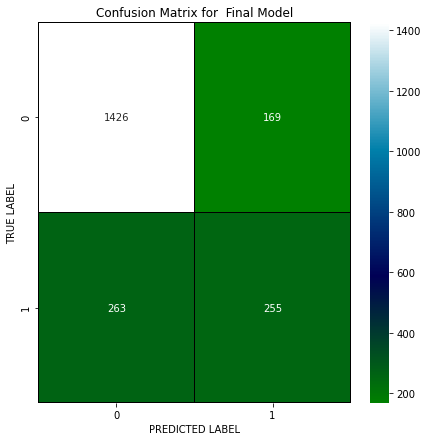

In [127]:
# Lets plot confusion matrix for  FinalModel

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

With the help of confusion matrix we can able to see actual and predicted values.

#### Plotting ROC and compare AUC for all the models used

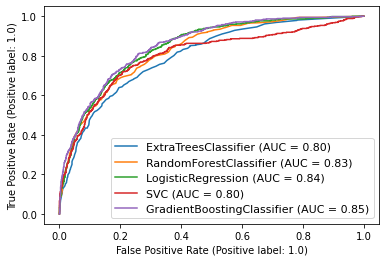

In [129]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(XT,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

#### Plotting ROC and Compare AUC for the best model

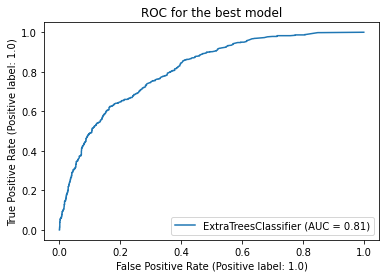

In [130]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

## Saving The Model

In [131]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

We have saved our model using joblib library.

### Predicting the saved model

In [132]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Customer_Churn_Analysis.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

These are the predicted churned values of the customers.

In [133]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
2108,1.0,1.0
2109,0.0,0.0
2110,0.0,0.0
2111,0.0,0.0


Both actual and predicted values are almost same.

## Concluding Remarks.

We went through the various tasks involved in Churn prediction in this article. It is important to note that finding patterns in Exploratory Data Analysis (EDA) is as important as the final prediction itself.

A Churn prediction task remains unfinished if the data patterns are not found in EDA. Most people can do the prediction part but struggle with data visualization and conveying the findings in an interesting way.

This skill is not only limited to Churn prediction but will also help you in the solving of the usual data science problems.